## 차원 축소

![PCA-LDA](https://d.pr/i/hI0WaD+)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### PCA (Principal Component Analysis)
- 데이터를 가장 잘 설명할 수 있는, 분산을 최대화하는 방향으로 축을 결정

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


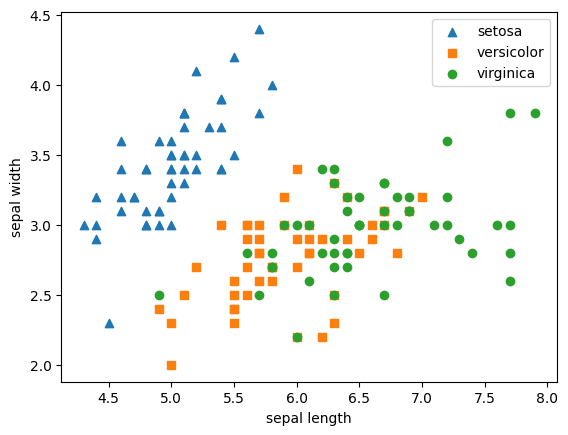

In [4]:
# 특성 2개만 뽑아서 시각화 
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [12]:
# PCA 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2차원으로 축소

X = iris_df.iloc[:, :-1]    # 독립변수(특성 데이터)만 모아서 X

pca.fit(X)
iris_pca = pca.transform(X)

iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2'])
iris_pca_df['target'] = iris_data.target

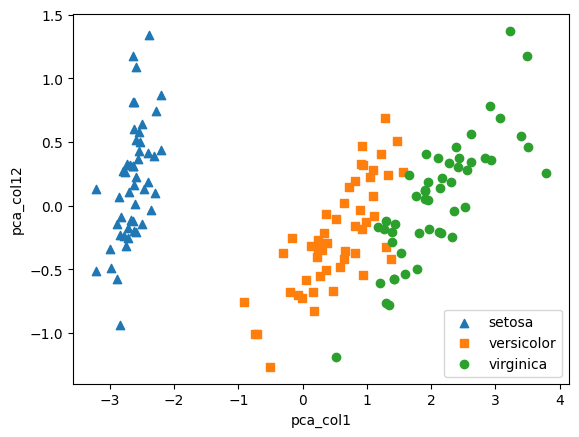

In [14]:
# 축소한 차원으로 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_df['target'] == i]['pca_col1']
    y = iris_pca_df[iris_df['target'] == i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])
    
plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col12')
plt.show()

In [15]:
# pca를 통해 생성된 주성분들이 실제 데이터 총 분산에 얼마만큼의 비율을 나타내는지 
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])